## 08. PyTorch Paper Replicating

### Milestone Project 2: PyTorch Paper Replicating

=> replicating a Machine Learning research paper and creating a Vision Transformer(ViT) from scrach using PyTorch.

#### • What is paper replicating?

=> many of advances get published in machine learning research papers.

**=> Goal of paper replicating:** take replicate advances with code -> use the techniques for own problem

**=> Involves:** *turn a machine learning paper comprised of images/digrams, math and test into usable code and in this case, usable PyTorch code. Digram, math equations and test from the `ViT paper.`*

#### • What is a machine learning research paper?
> (1) **Abstract** -> An overview/summary of the paper's main findings/contributions
>
> (2) **Introduction** -> What's the paper's main problem and details of previous methods used to try and solve it.
>
> (3) **Method** -> How did the researchers go about conducting their research? -> what model(s), data sources, training setups were used?
>
> (4) **Results** -> outcomes -> If a new type of model or training setup was used, how did the results of findings compare to previous works?
>
> (5) **Conclusion** -> limitations of the suggested methods? next steps for the research community?
>
> (6) **References** -> resources/other papers did the researchers look at to build their own body of work?
>
> (7) **Appendix** -> any extra resources/findings to look at
>


#### • Where to find code examples for ML research paper?
> (1) **arXiv** -> a free and open resource for reading technical articles on everything from physics to computer science
>
> (2) **AK Twitter** -> The AK Twitter account publishes machine learning research highlights, often with live demos almost every day
>
> (3) **Paper with Code** -> collection of trending, active and greatest machine learning papers, many of which include code resources attached. Also includes a collection of common machine learning datasets, benchmarks and current state-of-the-art models.
>
> (4) **lucidrains' `vit-pytorch` GitHub repository** -> Less of a place to find research papers and more of an example of what paper replicating with code on a larger-scale and with a specific focus looks like. 
>
> ...

### 0. Get Setup

=> replicate the machine learning research paper `An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale` (ViT paper) with PyTorch - https://arxiv.org/abs/2010.11929

=> The `Transformer neural network architecture` was originally introduced in the machine learning research paper `Attention is all you need` - https://arxiv.org/abs/1706.03762

=> A `Transformer architecture` is generally considered to be any neural network that uses the `attention mechanism` as its **primary learning layer**. Similar to a how a convolutional neural network (CNN) uses convolutions as its primary learning layer.

=> the `Vision Transformer (ViT) architecture` was designed to adapt the original Transformer architecture to vision problem(s)

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from torchinfo import summary

In [2]:
from go_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

device = "gpu" if torch.cuda.is_available() \
    else "mps" if torch.backends.mps.is_built() else "cpu"
device

'mps'

### 1. Get Data

=> continue on with FoodVision Mini -> still use the pizza, steak, sushi image dataset

In [3]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [4]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2. Create Dtasets and DataLoaders

=> use the `create_dataloaders()` function in `data_setup.py`.

• the training resolution is mentioned as being 224 (height=224, width=224)

In [5]:
from go_modular import data_setup
from torchvision import transforms

# Create image size -> comes from Table 3 of the ViT paper
IMG_SIZE = 224

# Create transforms pipline
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [6]:
BATCH_SIZE = 32

# create dataloaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

In [7]:
# get a single image and label from a batch of data and inspect their shapes

# get a batch of images
img_batch, label_batch = next(iter(train_dataloader))

# get a single image and label
img, label = img_batch[0], label_batch[0]

# view the shape
img.shape, label

(torch.Size([3, 224, 224]), tensor(2))

(-0.5, 223.5, 223.5, -0.5)

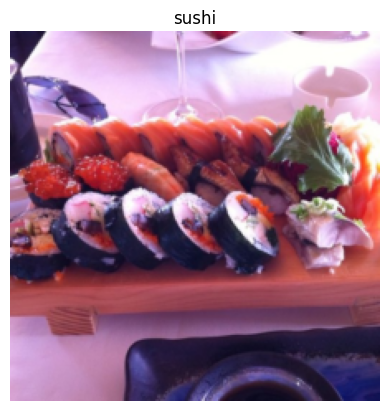

In [8]:
# plot the image
plt.imshow(img.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)